In [69]:
import numexpr as ne

In [60]:
pres = 10000
sres = 10000
lamb = 635.
opd=np.reshape(lamb*20.*np.arange(-0.5, 0.5, 1./pres), (-1,1,1))
wvn=np.reshape(np.pi*2./np.random.normal(lamb, 50.*np.ones((sres,))), (1,-1,1))
pha=np.reshape([0., np.pi/2., np.pi, 3.*np.pi/2.], (1,1,-1))
dat=opd*wvn+pha

In [61]:
timeit f1 = np.sum(np.cos(dat/2.)**2., axis=1)/sres

8.66 s ± 451 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
timeit f2 = np.sum(ne.evaluate("cos(dat/2.)**2."), axis=1)/sres

2.5 s ± 57.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


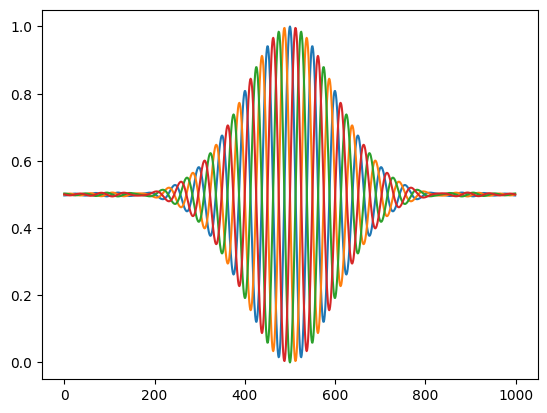

In [ ]:
plt.plot(f[:,0])
plt.plot(f[:,1])
plt.plot(f[:,2])
plt.plot(f[:,3])

In [313]:
run -i demo.py

Configuration loaded from ./config.yml
  + Red laser parameters:
    - Typical wavelength: 635.0 ± 1.0 nm
    - Wavelength instability: 0.5 nm
    - Peak intensity: 1e+06 counts/s
    - Power imbalance: 9.999999999999999e-05 %
------------------------------------------------------------
  + Green laser parameters:
    - Typical wavelength: 532.0 ± 1.0 nm
    - Wavelength instability: 0.5 nm
    - Peak intensity: 1e+06 counts/s
    - Power imbalance: 9.999999999999999e-05 %
------------------------------------------------------------
  + Blue laser parameters:
    - Typical wavelength: 405.0 ± 1.0 nm
    - Wavelength instability: 0.5 nm
    - Peak intensity: 1e+06 counts/s
    - Power imbalance: 9.999999999999999e-05 %
------------------------------------------------------------
  + Interference sensor parameters:
    - Gain deviation: 1.0 %
    - Phase deviation: 1.0 %
    - Background: 1e2
------------------------------------------------------------
  + ToF sensor parameters:
    - Pr

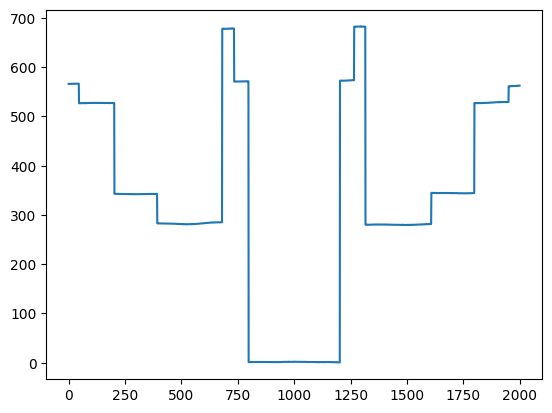

In [316]:
r,g,b,tof = get_sensors_data(np.arange(-1000,1000,1.))
x_r = (r[0,:,0]-r[0,:,2])/(r[0,:,0]+r[0,:,2])
y_r = (r[0,:,1]-r[0,:,3])/(r[0,:,1]+r[0,:,3])
x_g = (g[0,:,0]-g[0,:,2])/(g[0,:,0]+g[0,:,2])
y_g = (g[0,:,1]-g[0,:,3])/(g[0,:,1]+g[0,:,3])
x_b = (b[0,:,0]-b[0,:,2])/(b[0,:,0]+b[0,:,2])
y_b = (b[0,:,1]-b[0,:,3])/(b[0,:,1]+b[0,:,3])
phi_r=np.arctan2(y_r, x_r)
phi_g=np.arctan2(y_g, x_g)
phi_b=np.arctan2(y_b, x_b)
#plt.plot(np.log(((x_r-x_g)**2. + (y_r-y_g)**2.)**.5))
plt.plot(((
    (phi_r*cfg.r_wavelength/2./np.pi - phi_g*cfg.g_wavelength/2./np.pi)**2.+
    (phi_g*cfg.g_wavelength/2./np.pi - phi_b*cfg.b_wavelength/2./np.pi)**2.+
    (phi_b*cfg.b_wavelength/2./np.pi - phi_r*cfg.r_wavelength/2./np.pi)**2.
)**.5))
#plt.plot(phi_r*cfg.r_wavelength/2./np.pi)
#plt.plot(phi_g*cfg.g_wavelength/2./np.pi)

In [246]:
print(np.rad2deg(np.arctan2(y_r[0],x_r[0])))
print(np.rad2deg(np.arctan2(y_g[0],x_g[0])))

1.399237284952957
2.0820949516147653
